In [1]:
from sklearn.calibration import calibration_curve
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv("TrainData.csv")
test_df = pd.read_csv("TestData.csv")
validation_df = pd.read_csv("ValidationData.csv")

In [3]:
x_train = train_df['lemmatized_text']
y_train = train_df['label']

x_validation = validation_df['lemmatized_text']
y_validation = validation_df['label']

x_test = test_df['lemmatized_text']
y_test = test_df['label']

In [4]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit label encoder and return encoded labels
y_train = label_encoder.fit_transform(y_train)
y_validation = label_encoder.transform(y_validation)
y_test = label_encoder.transform(y_test)

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

vectorizer = TfidfVectorizer(stop_words = 'english', max_features=1500)
x_train = vectorizer.fit_transform(x_train.astype('U'))
x_validation = vectorizer.transform(x_validation.astype('U'))
x_test = vectorizer.transform(x_test.astype('U'))

In [6]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train.toarray())
x_validation = scaler.transform(x_validation.toarray())
x_test = scaler.transform(x_test.toarray())

In [36]:
import pickle
nn_model = pickle.load(open('nn_model.pkl', 'rb'))

prob = pd.DataFrame(nn_model.predict_proba(x_test))
y_train = pd.DataFrame(y_train)

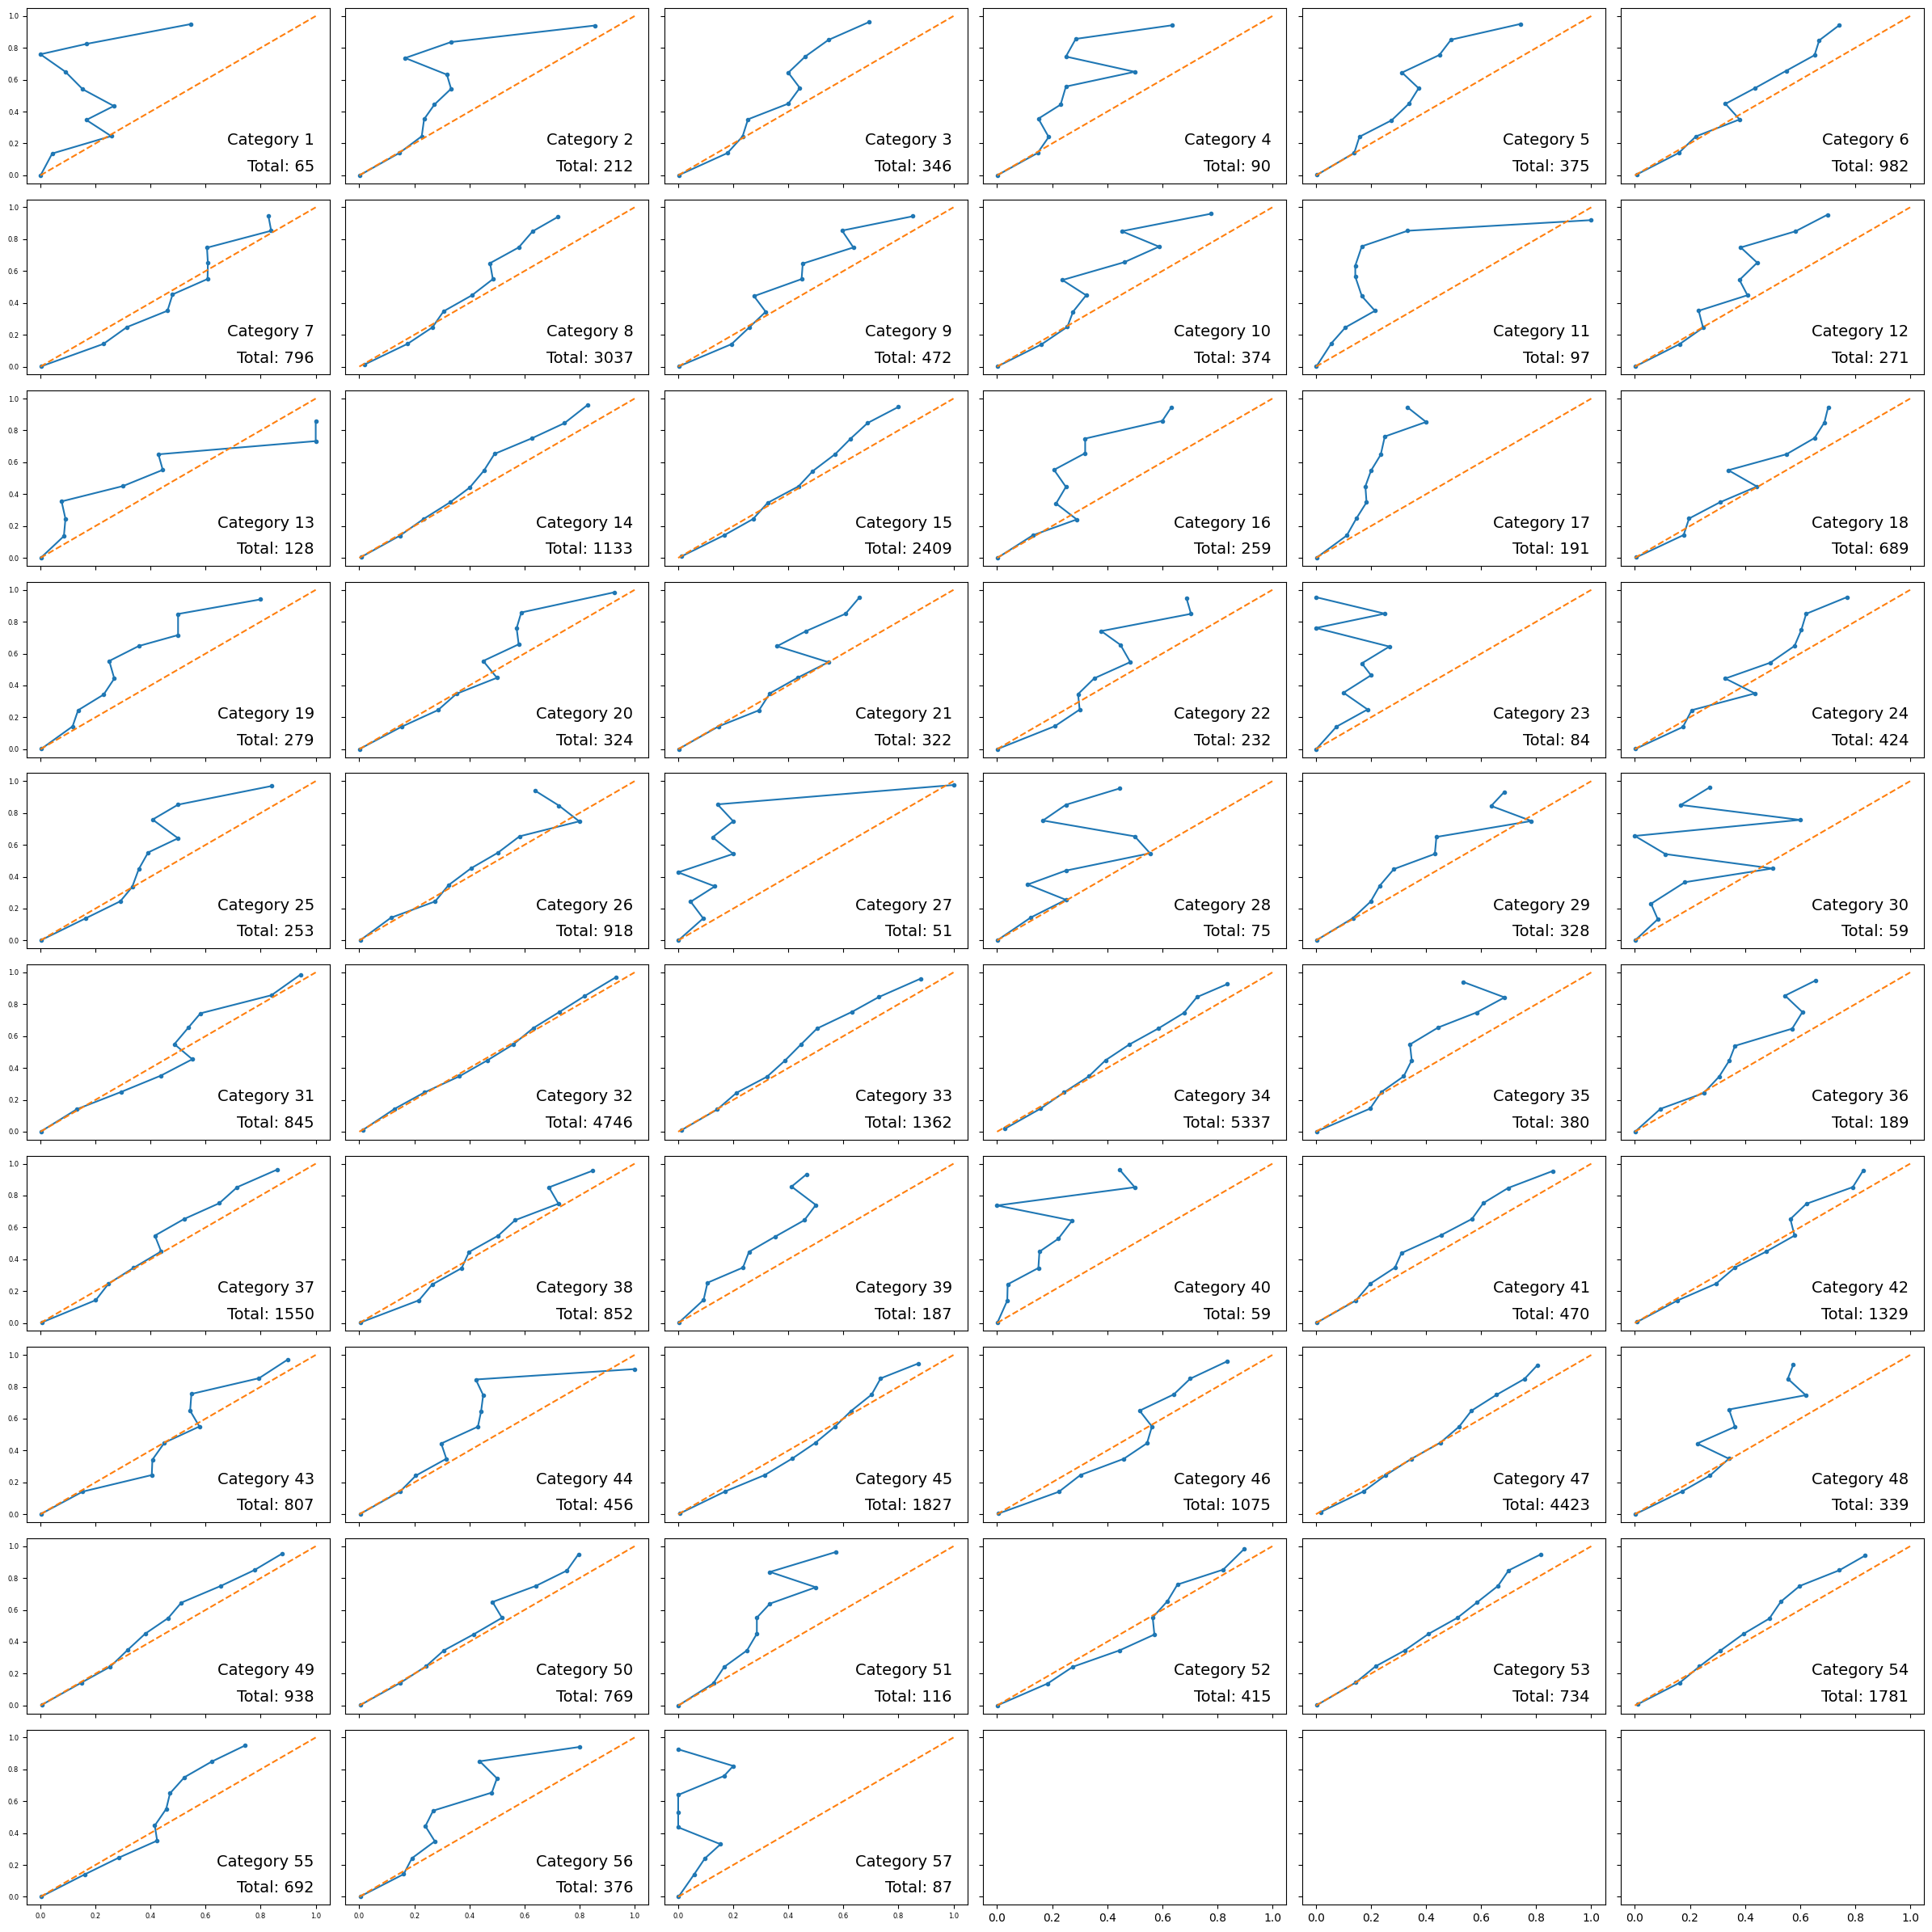

In [43]:
num_categories = prob.shape[1]

fig, axs = plt.subplots(10, 6, figsize=(24, 24), sharex=True, sharey=True)

for category_index in range(num_categories):
    row = category_index // 6
    col = category_index % 6
    ax = axs[row, col]
    
    x, y = calibration_curve(y_test == category_index, prob.iloc[:, category_index], n_bins=10)
    total_occ = ((y_test == category_index).sum()).values[0]
    ax.plot(x, y, marker='.')
    ax.plot([0, 1], [0, 1], linestyle='--')
    ax.text(0.95, 0.05, 'Total: {}'.format(total_occ), transform=ax.transAxes,
            horizontalalignment='right', verticalalignment='bottom', fontsize=14)
    ax.text(0.95, 0.2, 'Category {}'.format(category_index + 1), transform=ax.transAxes,
            horizontalalignment='right', verticalalignment='bottom', fontsize=14)
    ax.tick_params(axis='both', which='both', labelsize=6)

plt.tight_layout()
plt.show()

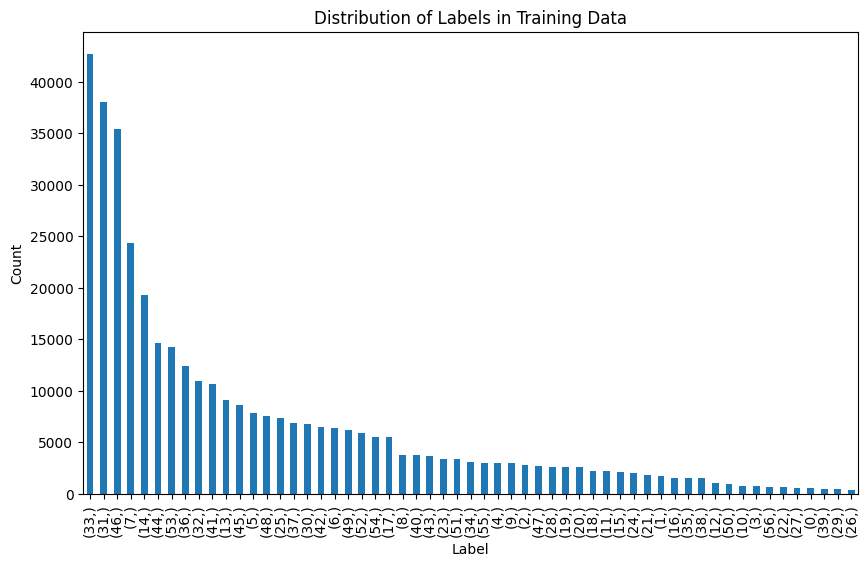

In [37]:
plt.figure(figsize=(10, 6))
y_train.value_counts().plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels in Training Data')
plt.show()

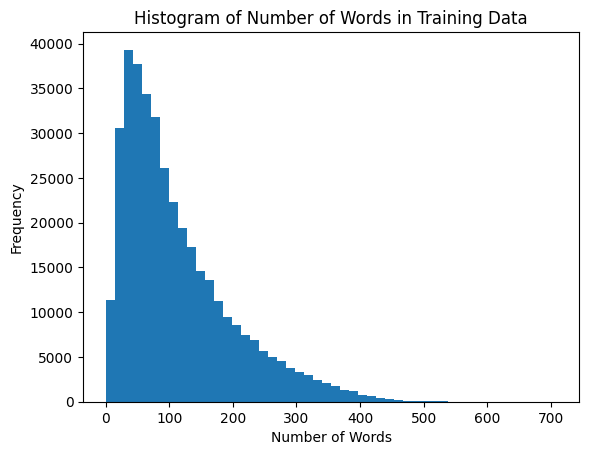

In [39]:
# Calculate the number of words in each text
word_counts = train_df['text'].apply(lambda x: len(x.split()))

# Create a histogram
plt.hist(word_counts, bins=50)
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Words in Training Data')
plt.show()